# Cars data analysis
- I downloaded the cars data from kaggle 


- Importe libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go


# Reading the dataset

In [372]:
# reading the dataset
df = pd.read_csv('cars_data.csv')
df.head()

,car_name,variant,transmission,km_driven,owner_type,fuel_type,registeration,price
0,2018 Tata NEXON,XM 1.2,Manual,"95,230 km",1st Owner,Petrol,UP-16,"₹6,50,000"
1,2017 Renault Kwid,1.0 RXT Opt,Manual,"72,956 km",2nd Owner,Petrol,HR-11,"₹3,19,000"
2,2017 HYUNDAI ELITE I20,ASTA 1.2 (O),Manual,"50,636 km",2nd Owner,Petrol,DL-7C,"₹5,87,000"
3,2019 Mahindra XUV 3OO,W8(O),Manual,"86,652 km",1st Owner,Diesel,DL-12,"₹8,22,000"
4,2020 Hyundai Creta,1.5 SX (O) AT,Automatic,"20,235 km",1st Owner,Petrol,DL-9C,"₹16,74,000"


In [373]:
# Not enough information lets see the info of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       899 non-null    object
 1   variant        899 non-null    object
 2   transmission   894 non-null    object
 3   km_driven      899 non-null    object
 4   owner_type     899 non-null    object
 5   fuel_type      899 non-null    object
 6   registeration  899 non-null    object
 7   price          899 non-null    object
dtypes: object(8)
memory usage: 56.3+ KB


- There are some mistakes in the dataset so lets clean the dataset
- Some columns are in object type so we need to convert them into numeric type
    - 1. In the km_driven column there is a comma(,) and km  so we need to remove it.
    - 2. In the price column there is a ₹ symbol & comma(,) so we need to remove it. 

In [374]:
# some columns are in object type so we need to convert them into numeric type
# 1. km_driven
# 2. price

df['km_driven'] = df['km_driven'].str.replace(',','')
df['km_driven'] = df['km_driven'].str.replace('km','').astype(int)

df['price'] = df['price'].str.replace('₹','')
df['price'] = df['price'].str.replace(',','').astype(int)


In [375]:
# lets check it 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       899 non-null    object
 1   variant        899 non-null    object
 2   transmission   894 non-null    object
 3   km_driven      899 non-null    int64 
 4   owner_type     899 non-null    object
 5   fuel_type      899 non-null    object
 6   registeration  899 non-null    object
 7   price          899 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 56.3+ KB


In [376]:
df.head()

,car_name,variant,transmission,km_driven,owner_type,fuel_type,registeration,price
0,2018 Tata NEXON,XM 1.2,Manual,95230,1st Owner,Petrol,UP-16,650000
1,2017 Renault Kwid,1.0 RXT Opt,Manual,72956,2nd Owner,Petrol,HR-11,319000
2,2017 HYUNDAI ELITE I20,ASTA 1.2 (O),Manual,50636,2nd Owner,Petrol,DL-7C,587000
3,2019 Mahindra XUV 3OO,W8(O),Manual,86652,1st Owner,Diesel,DL-12,822000
4,2020 Hyundai Creta,1.5 SX (O) AT,Automatic,20235,1st Owner,Petrol,DL-9C,1674000


 - The owner_type column is in object type so we need to convert it into numeric type. 
    

In [377]:
# I want to change the owner_type column into numeric type
# first check that how many owner type are there
print(df['owner_type'].value_counts())

# lets change it 
df['owner_type'] = df['owner_type'].map({'1st Owner':1,'2nd Owner':2})

print('----------------------------')
# lets check the dtype of the owner_type column
print(f'now the dtype of the owner_type column is {df['owner_type'].dtype}')

# now we have changed the owner_type column into numeric type
df['owner_type'] = df['owner_type'].astype(int)

owner_type
1st Owner    762
2nd Owner    137
Name: count, dtype: int64
----------------------------
now the dtype of the owner_type column is int64


In [378]:
# lets check it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       899 non-null    object
 1   variant        899 non-null    object
 2   transmission   894 non-null    object
 3   km_driven      899 non-null    int64 
 4   owner_type     899 non-null    int64 
 5   fuel_type      899 non-null    object
 6   registeration  899 non-null    object
 7   price          899 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 56.3+ KB


In [379]:
df.head(10)

,car_name,variant,transmission,km_driven,owner_type,fuel_type,registeration,price
0,2018 Tata NEXON,XM 1.2,Manual,95230,1,Petrol,UP-16,650000
1,2017 Renault Kwid,1.0 RXT Opt,Manual,72956,2,Petrol,HR-11,319000
2,2017 HYUNDAI ELITE I20,ASTA 1.2 (O),Manual,50636,2,Petrol,DL-7C,587000
3,2019 Mahindra XUV 3OO,W8(O),Manual,86652,1,Diesel,DL-12,822000
4,2020 Hyundai Creta,1.5 SX (O) AT,Automatic,20235,1,Petrol,DL-9C,1674000
5,2021 MAHINDRA SCORPIO,S11,Manual,15235,1,Diesel,UP-32,1731000
6,2014 Hyundai Verna,FLUIDIC 1.4 VTVT CX,Manual,57937,1,Petrol,DL-12,501000
7,2017 Tata Tiago,XZ PETROL,Manual,50097,1,Petrol,HR-26,419000
8,2019 Maruti Eeco,5 STR WITH A/C+HTR,Manual,15468,1,Petrol,DL-2C,486000
9,2015 VOLKSWAGEN POLO,HIGHLINE1.2L PETROL,Manual,64704,2,Petrol,DL-3C,495000


-  Based on your analysis If you want to change the transmission column into numeric type then you can do it like this . 

In [380]:
# # I want to change the transmission column into numeric type
# # first check that how many transmission are there
# print(df['transmission'].value_counts())

# # lets change it
# df['transmission'] = df['transmission'].map({'Manual':0,'Automatic':1})

# print('----------------------------')
# # lets check the dtype of the transmission column
# print(f'now the dtype of the transmission column is {df['transmission'].dtype}')

In [381]:
df.head()

,car_name,variant,transmission,km_driven,owner_type,fuel_type,registeration,price
0,2018 Tata NEXON,XM 1.2,Manual,95230,1,Petrol,UP-16,650000
1,2017 Renault Kwid,1.0 RXT Opt,Manual,72956,2,Petrol,HR-11,319000
2,2017 HYUNDAI ELITE I20,ASTA 1.2 (O),Manual,50636,2,Petrol,DL-7C,587000
3,2019 Mahindra XUV 3OO,W8(O),Manual,86652,1,Diesel,DL-12,822000
4,2020 Hyundai Creta,1.5 SX (O) AT,Automatic,20235,1,Petrol,DL-9C,1674000


- In the car_name column there are some mistakes so we need to clean it.
    -  lets extract the model year and car company to new columns 

In [382]:
# lets extract the model year from the car_name column
df['model_year'] = df['car_name'].str.split().str[0]
# and also car campany from the car_name column
df['car_company'] = df['car_name'].str.split().str[1]

# now delete the model year from the car_name column
df['car_name'] = df['car_name'].str.split().str[2:]
df.head()

,car_name,variant,transmission,km_driven,owner_type,fuel_type,registeration,price,model_year,car_company
0,[NEXON],XM 1.2,Manual,95230,1,Petrol,UP-16,650000,2018,Tata
1,[Kwid],1.0 RXT Opt,Manual,72956,2,Petrol,HR-11,319000,2017,Renault
2,"[ELITE, I20]",ASTA 1.2 (O),Manual,50636,2,Petrol,DL-7C,587000,2017,HYUNDAI
3,"[XUV, 3OO]",W8(O),Manual,86652,1,Diesel,DL-12,822000,2019,Mahindra
4,[Creta],1.5 SX (O) AT,Automatic,20235,1,Petrol,DL-9C,1674000,2020,Hyundai


In [383]:
# lets remove the square brackets from the car_name column
df['car_name'] = df['car_name'].str.join(' ')


In [384]:
df.head()

,car_name,variant,transmission,km_driven,owner_type,fuel_type,registeration,price,model_year,car_company
0,NEXON,XM 1.2,Manual,95230,1,Petrol,UP-16,650000,2018,Tata
1,Kwid,1.0 RXT Opt,Manual,72956,2,Petrol,HR-11,319000,2017,Renault
2,ELITE I20,ASTA 1.2 (O),Manual,50636,2,Petrol,DL-7C,587000,2017,HYUNDAI
3,XUV 3OO,W8(O),Manual,86652,1,Diesel,DL-12,822000,2019,Mahindra
4,Creta,1.5 SX (O) AT,Automatic,20235,1,Petrol,DL-9C,1674000,2020,Hyundai


In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       899 non-null    object
 1   variant        899 non-null    object
 2   transmission   894 non-null    object
 3   km_driven      899 non-null    int64 
 4   owner_type     899 non-null    int64 
 5   fuel_type      899 non-null    object
 6   registeration  899 non-null    object
 7   price          899 non-null    int64 
 8   model_year     899 non-null    object
 9   car_company    899 non-null    object
dtypes: int64(3), object(7)
memory usage: 70.4+ KB


-  lets change the model_year column into numeric type
    

In [386]:
# lets change the model_year column into numeric type
df['model_year'] = df['model_year'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   car_name       899 non-null    object
 1   variant        899 non-null    object
 2   transmission   894 non-null    object
 3   km_driven      899 non-null    int64 
 4   owner_type     899 non-null    int64 
 5   fuel_type      899 non-null    object
 6   registeration  899 non-null    object
 7   price          899 non-null    int64 
 8   model_year     899 non-null    int64 
 9   car_company    899 non-null    object
dtypes: int64(4), object(6)
memory usage: 70.4+ KB


In [387]:
df.head()

,car_name,variant,transmission,km_driven,owner_type,fuel_type,registeration,price,model_year,car_company
0,NEXON,XM 1.2,Manual,95230,1,Petrol,UP-16,650000,2018,Tata
1,Kwid,1.0 RXT Opt,Manual,72956,2,Petrol,HR-11,319000,2017,Renault
2,ELITE I20,ASTA 1.2 (O),Manual,50636,2,Petrol,DL-7C,587000,2017,HYUNDAI
3,XUV 3OO,W8(O),Manual,86652,1,Diesel,DL-12,822000,2019,Mahindra
4,Creta,1.5 SX (O) AT,Automatic,20235,1,Petrol,DL-9C,1674000,2020,Hyundai


-  lets put the car_company column in front of the car_name column & model_year column in front of the variant column

In [388]:
# lets put the car_company column in front of the car_name column
df = df[['car_company',  'car_name', 'model_year','variant', 'transmission', 'km_driven', 'owner_type', 'fuel_type', 'registeration', 'price']]
df.head()

,car_company,car_name,model_year,variant,transmission,km_driven,owner_type,fuel_type,registeration,price
0,Tata,NEXON,2018,XM 1.2,Manual,95230,1,Petrol,UP-16,650000
1,Renault,Kwid,2017,1.0 RXT Opt,Manual,72956,2,Petrol,HR-11,319000
2,HYUNDAI,ELITE I20,2017,ASTA 1.2 (O),Manual,50636,2,Petrol,DL-7C,587000
3,Mahindra,XUV 3OO,2019,W8(O),Manual,86652,1,Diesel,DL-12,822000
4,Hyundai,Creta,2020,1.5 SX (O) AT,Automatic,20235,1,Petrol,DL-9C,1674000


- 

In [389]:
# I just view the first 5 rows of the dataframe and then i realise that the car_company column have mix of upper and lower case letters so we need to convert it into upper case

df['car_company'] = df['car_company'].str.upper()

df.head(3)

,car_company,car_name,model_year,variant,transmission,km_driven,owner_type,fuel_type,registeration,price
0,TATA,NEXON,2018,XM 1.2,Manual,95230,1,Petrol,UP-16,650000
1,RENAULT,Kwid,2017,1.0 RXT Opt,Manual,72956,2,Petrol,HR-11,319000
2,HYUNDAI,ELITE I20,2017,ASTA 1.2 (O),Manual,50636,2,Petrol,DL-7C,587000


-  lets check the model_year column that how many unique values are there ,sort by model_year

In [390]:
# lets check the  model_year column that how many unique values are there ,sort by model_year
df['model_year'].value_counts().sort_index(ascending=False)


model_year
2022     33
2021    147
2020    129
2019    164
2018    153
2017     84
2016     55
2015     52
2014     38
2013     18
2012     10
2011     12
2010      4
Name: count, dtype: int64

- lets check that the how many car companies are there and how many cars are there for each car company

In [391]:
 # lets chack the car campanies
df['car_company'].value_counts()

car_company
MARUTI        374
HYUNDAI       196
HONDA         106
RENAULT        52
TATA           46
MAHINDRA       32
TOYOTA         23
KIA            18
VOLKSWAGEN     15
FORD           15
SKODA           7
DATSUN          6
MG              3
NISSAN          3
JEEP            3
Name: count, dtype: int64

- lets check the null values


In [392]:
# lets check  the null values
df.isnull().sum() / len(df) * 100

car_company      0.000000
car_name         0.000000
model_year       0.000000
variant          0.000000
transmission     0.556174
km_driven        0.000000
owner_type       0.000000
fuel_type        0.000000
registeration    0.000000
price            0.000000
dtype: float64

- lets check that which are the null values

In [393]:
# lets check that which are the null values in the transmission column
df[df['transmission'].isnull()]

,car_company,car_name,model_year,variant,transmission,km_driven,owner_type,fuel_type,registeration,price
228,MARUTI,BREZZA,2022,ZXI + AT SMART HYBRID,NaN,9124,1,Petrol,UP-14,1295000
517,MARUTI,Alto K10,2015,VXI OPT,NaN,45540,1,Petrol,DL-2C,307000
520,HYUNDAI,Eon,2018,MAGNA PLUS OPTIONAL,NaN,33233,1,Petrol,UP-21,365000
766,TATA,ALTROZ,2020,XZ (O) 1.2 RTN,NaN,54207,1,Petrol,DL-11,731000
822,MAHINDRA,THAR,2021,LX HT PETROL 4WD MT,NaN,4870,1,Petrol,HR-26,1475000


- lets fill the null values

In [394]:
# fill the null values with mode
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])

# lets check that how many null values are there    
df.isnull().sum()


car_company      0
car_name         0
model_year       0
variant          0
transmission     0
km_driven        0
owner_type       0
fuel_type        0
registeration    0
price            0
dtype: int64

- lets check the duplicate values

In [395]:
# lets check the duplicate values
df.duplicated().sum()

np.int64(0)

- There is no duplicate values

# lets analyse the data 

In [396]:
df.head(10)

,car_company,car_name,model_year,variant,transmission,km_driven,owner_type,fuel_type,registeration,price
0,TATA,NEXON,2018,XM 1.2,Manual,95230,1,Petrol,UP-16,650000
1,RENAULT,Kwid,2017,1.0 RXT Opt,Manual,72956,2,Petrol,HR-11,319000
2,HYUNDAI,ELITE I20,2017,ASTA 1.2 (O),Manual,50636,2,Petrol,DL-7C,587000
3,MAHINDRA,XUV 3OO,2019,W8(O),Manual,86652,1,Diesel,DL-12,822000
4,HYUNDAI,Creta,2020,1.5 SX (O) AT,Automatic,20235,1,Petrol,DL-9C,1674000
5,MAHINDRA,SCORPIO,2021,S11,Manual,15235,1,Diesel,UP-32,1731000
6,HYUNDAI,Verna,2014,FLUIDIC 1.4 VTVT CX,Manual,57937,1,Petrol,DL-12,501000
7,TATA,Tiago,2017,XZ PETROL,Manual,50097,1,Petrol,HR-26,419000
8,MARUTI,Eeco,2019,5 STR WITH A/C+HTR,Manual,15468,1,Petrol,DL-2C,486000
9,VOLKSWAGEN,POLO,2015,HIGHLINE1.2L PETROL,Manual,64704,2,Petrol,DL-3C,495000


## what is the average price of the cars for each car company?

car_company
JEEP          1540000
MG            1489000
KIA           1345777
MAHINDRA      1314343
SKODA         1015000
VOLKSWAGEN     954133
TOYOTA         932304
TATA           904557
NISSAN         745666
FORD           726266
HONDA          685169
RENAULT        676807
HYUNDAI        670692
MARUTI         596739
DATSUN         360666
Name: price, dtype: int64


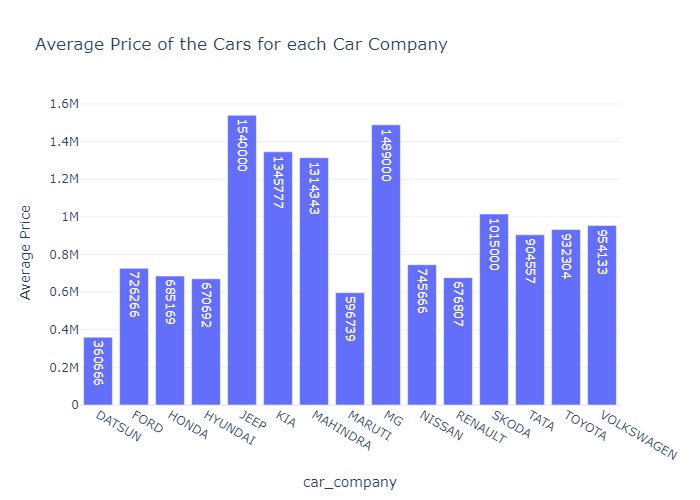

In [427]:
# what is the average price of the cars for each car company?
avg_price = df.groupby('car_company')['price'].mean().astype(int)
print((avg_price).sort_values(ascending=False))
# create a  figure of average price of the cars for each car company
fig = px.bar(df.groupby('car_company')['price'].mean().astype(int),
             x=df.groupby('car_company')['price'].mean().astype(int).index,
             y=df.groupby('car_company')['price'].mean().astype(int).values,
             title='Average Price of the Cars for each Car Company',
             labels={'x':'car_company','y':'Average Price'},
             text=df.groupby('car_company')['price'].mean().astype(int).values,
             template='plotly_white')
fig.show()

# save this figure in this ipynb file
# fig.write_image('Average Price of the Cars for each Car Company.png')
from IPython.display import Image
Image(filename='Average Price of the Cars for each Car Company.png')


## How does the price of cars vary with the year of manufacture? 

model_year
2021    930652
2022    914733
2020    799953
2019    734356
2018    702026
2017    624782
2016    559709
2015    523146
2014    411315
2012    339000
2013    337908
2011    271166
2010    184250
Name: price, dtype: int64


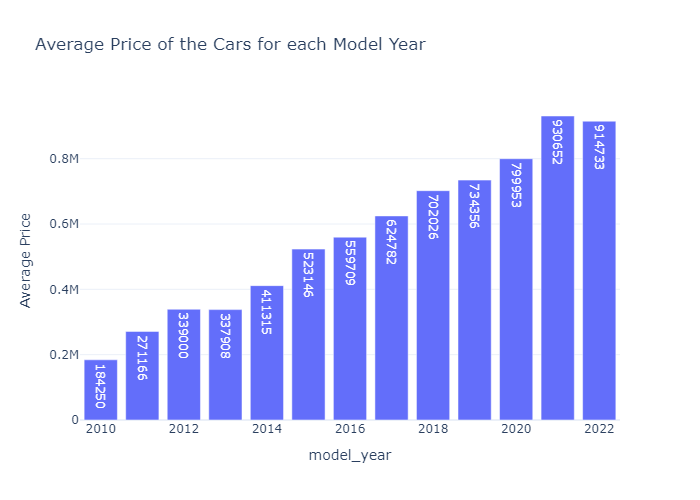

In [429]:
# How does the price of cars vary with the year of manufacture? 
price_yr = df.groupby('model_year')['price'].mean().astype(int)
print((price_yr).sort_values(ascending=False))

# create a  figure of this.
fig = px.bar(df.groupby('model_year')['price'].mean().astype(int), 
             x=df.groupby('model_year')['price'].mean().astype(int).index,
             y=df.groupby('model_year')['price'].mean().astype(int).values,
             title='Average Price of the Cars for each Model Year',
             labels={'x':'model_year','y':'Average Price'},
             text=df.groupby('model_year')['price'].mean().astype(int).values,
             template='plotly_white')
fig.show()

# save this figure in this ipynb file
# fig.write_image('Average Price of the Cars for each Model Year.png')
from IPython.display import Image
Image(filename='Average Price of the Cars for each Model Year.png')

## What is the distribution of different fuel types among the cars?


fuel_type
Diesel    1015028
Petrol     667168
CNG        583572
Name: price, dtype: int64


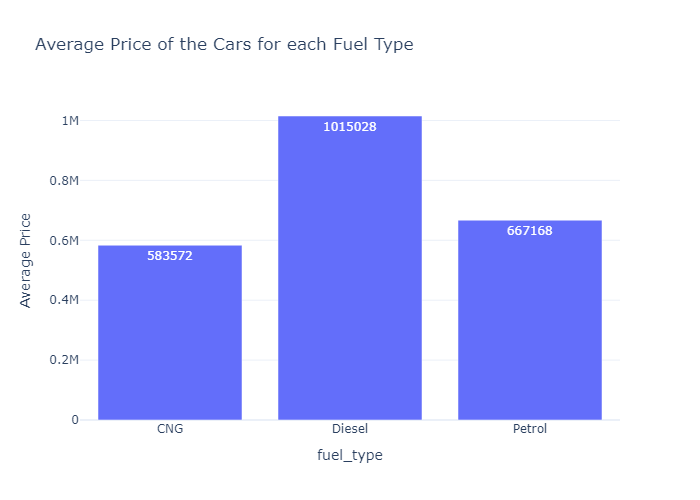

In [431]:
# What is the distribution of different fuel types among the cars?

fuel_type = df.groupby('fuel_type')['price'].mean().astype(int)
print((fuel_type).sort_values(ascending=False))

# create a  figure of this.
fig = px.bar(df.groupby('fuel_type')['price'].mean().astype(int),
             x=df.groupby('fuel_type')['price'].mean().astype(int).index,
             y=df.groupby('fuel_type')['price'].mean().astype(int).values,
             title='Average Price of the Cars for each Fuel Type',
             labels={'x':'fuel_type','y':'Average Price'},
             text=df.groupby('fuel_type')['price'].mean().astype(int).values,
             template='plotly_white')
fig.show()

# save this figure in this ipynb file
# fig.write_image('Average Price of the Cars for each Fuel Type.png')
from IPython.display import Image
Image(filename='Average Price of the Cars for each Fuel Type.png')

## Which car model has the highest average kilometer driven?

car_name
SANTRO XING      95604
Corolla Altis    94447
Ertiga           94052
Camry            93626
Tucson New       86933
                 ...  
MAGNITE          12487
TRIBER            9873
BREZZA            9124
Vento             6323
New Elantra       3415
Name: km_driven, Length: 126, dtype: int64


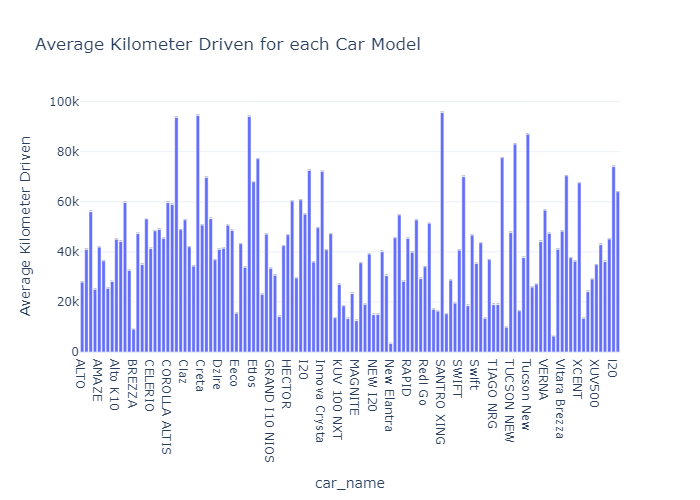

In [433]:
# Which car model has the highest average kilometer driven?

km_driven = df.groupby('car_name')['km_driven'].mean().astype(int)
print((km_driven).sort_values(ascending=False))

# create a  figure of this.
fig = px.bar(df.groupby('car_name')['km_driven'].mean().astype(int),
             x=df.groupby('car_name')['km_driven'].mean().astype(int).index,
             y=df.groupby('car_name')['km_driven'].mean().astype(int).values,
             title='Average Kilometer Driven for each Car Model',
             labels={'x':'car_name','y':'Average Kilometer Driven'},
             text=df.groupby('car_name')['km_driven'].mean().astype(int).values,
             template='plotly_white')
fig.show()

# save this figure in this ipynb file
# fig.write_image('Average Kilometer Driven for each Car Model.png')
from IPython.display import Image
Image(filename='Average Kilometer Driven for each Car Model.png')

transmission
Automatic    904895
Manual       655734
Name: price, dtype: int64


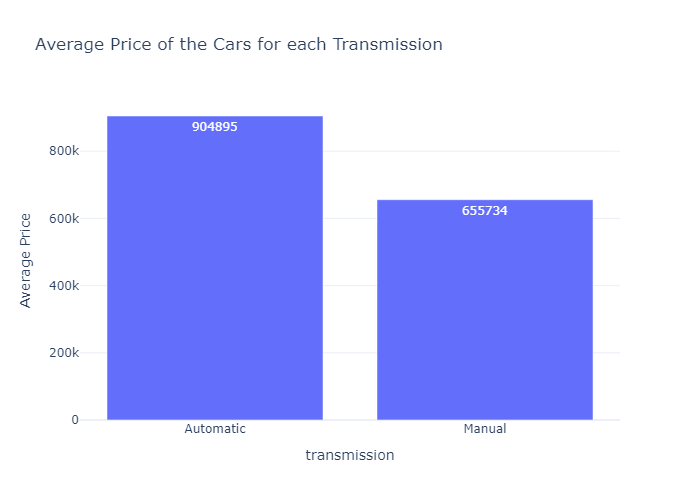

In [435]:
# What is the most common transmission for among the cars?

transmission = df.groupby('transmission')['price'].mean().astype(int)
print((transmission).sort_values(ascending=False))

# create a  figure of this.
fig = px.bar(df.groupby('transmission')['price'].mean().astype(int),
             x=df.groupby('transmission')['price'].mean().astype(int).index,
             y=df.groupby('transmission')['price'].mean().astype(int).values,
             title='Average Price of the Cars for each Transmission',
             labels={'x':'transmission','y':'Average Price'},
             text=df.groupby('transmission')['price'].mean().astype(int).values,
             template='plotly_white')
fig.show()

# save this figure in this ipynb file
# fig.write_image('Average Price of the Cars for each Transmission.png')
from IPython.display import Image
Image(filename='Average Price of the Cars for each Transmission.png')

## What is the average price of the cars for each owner type?

owner_type
1    725481
2    618802
Name: price, dtype: int64


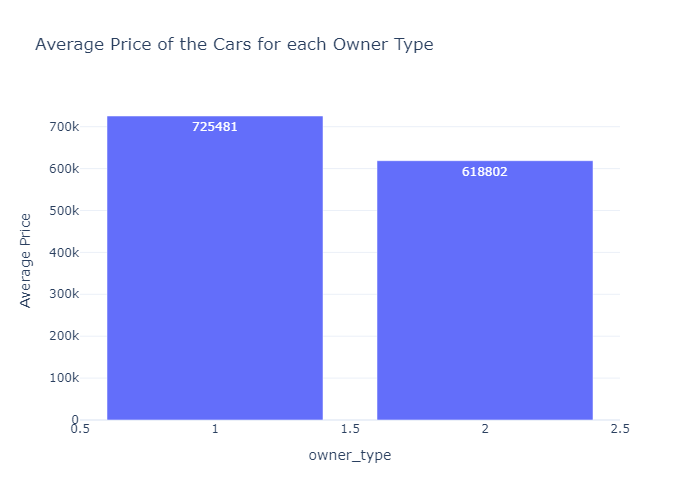

In [437]:
# What is the average price of the cars for each owner type?

owner_type = df.groupby('owner_type')['price'].mean().astype(int)
print((owner_type).sort_values(ascending=False))    

# create a  figure of this.
fig = px.bar(df.groupby('owner_type')['price'].mean().astype(int),
             x=df.groupby('owner_type')['price'].mean().astype(int).index,
             y=df.groupby('owner_type')['price'].mean().astype(int).values,
             title='Average Price of the Cars for each Owner Type',
             labels={'x':'owner_type','y':'Average Price'},
             text=df.groupby('owner_type')['price'].mean().astype(int).values,
             template='plotly_white')
fig.show()

# save this figure in this ipynb file
# fig.write_image('Average Price of the Cars for each Owner Type.png')
from IPython.display import Image
Image(filename='Average Price of the Cars for each Owner Type.png')